In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.10

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 59 kB 7.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73268 sha256=36d1b52ae64239bfde2e75acadcb76f6d930fadd4330a85853b1a1551e7cebcb
  Stored in directory: /root/.cache/pip/wheels/1c/dd/dd/c493e6f981182c1411e288c553310f76e212bac3afbdac1294
Successfully built kaggle


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import os


In [ ]:
os.environ['KAGGLE_CONFIG_DIR' ] =  '/content'

In [ ]:
! kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [01:17<00:00, 35.6MB/s]
100% 4.00G/4.00G [01:17<00:00, 55.5MB/s]


In [ ]:
import zipfile
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance


In [ ]:
with zipfile.ZipFile("state-farm-distracted-driver-detection.zip","r") as zf:
    zf.extractall()

In [ ]:
!ls

-		      img_100371.jpg
driver_imgs_list.csv  img_100375.jpg
img_100000.jpg	      img_100399.jpg
img_100001.jpg	      img_100403.jpg
img_100002.jpg	      img_100442.jpg
img_100003.jpg	      img_100451.jpg
img_100004.jpg	      img_100452.jpg
img_100005.jpg	      img_100458.jpg
img_100007.jpg	      img_100469.jpg
img_100008.jpg	      img_100471.jpg
img_100009.jpg	      img_100472.jpg
img_10000.jpg	      img_10048.jpg
img_100010.jpg	      img_100493.jpg
img_100011.jpg	      img_100502.jpg
img_100012.jpg	      img_10050.jpg
img_100013.jpg	      img_100514.jpg
img_100014.jpg	      img_100529.jpg
img_100016.jpg	      img_10052.jpg
img_10001.jpg	      img_100530.jpg
img_100021.jpg	      img_100556.jpg
img_100027.jpg	      img_100561.jpg
img_100029.jpg	      img_100579.jpg
img_100045.jpg	      img_100594.jpg
img_100046.jpg	      img_100627.jpg
img_100061.jpg	      img_100636.jpg
img_1000.jpg	      img_100638.jpg
img_100108.jpg	      img_100646.jpg
img_100113.jpg	      img_100676.jpg
img_10011.

In [ ]:
sample_path = "/content/sample_submission.csv"
imgs_list_path = "/content/driver_imgs_list.csv"
train_path = "/content/imgs/train"

In [ ]:
driver_imgs_list = pd.read_csv(imgs_list_path)
driver_imgs_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
os.listdir(train_path)

['c8', 'c5', 'c2', 'c9', 'c6', 'c0', 'c1', 'c3', 'c4', 'c7']

In [ ]:
def pair_sort(className,values):
    for j in range(0,len(className)-1):
        for i in range(0,len(className)-1):
            if values[i] > values[i+1]:
                temp =  values[i+1]
                values[i+1] = values[i]
                values[i] = temp

                N_temp =  className[i+1]
                className[i+1] = className[i]
                className[i] = N_temp
    
    return className,values

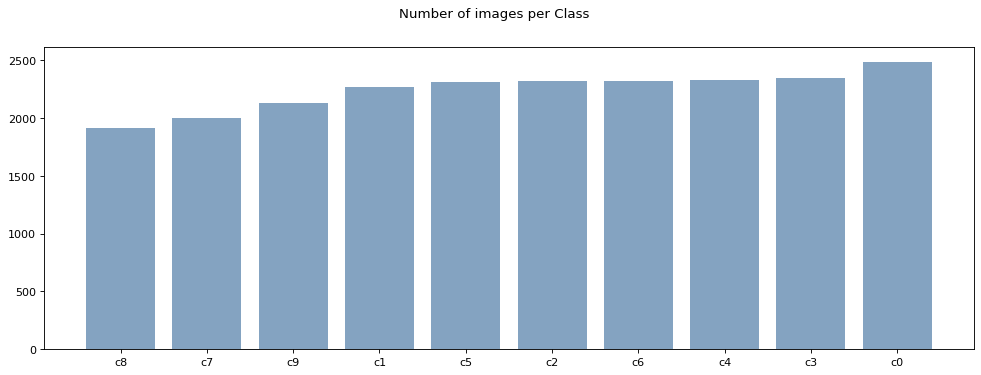

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

class_names = np.unique(driver_imgs_list['classname'])
class_image_list = [len(driver_imgs_list[driver_imgs_list['classname'] == current_class]) for current_class in class_names]

class_names,class_image_list=  pair_sort(class_names,class_image_list)

#plt.figure()
plt.suptitle('Number of images per Class')
plt.bar(class_names,class_image_list,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

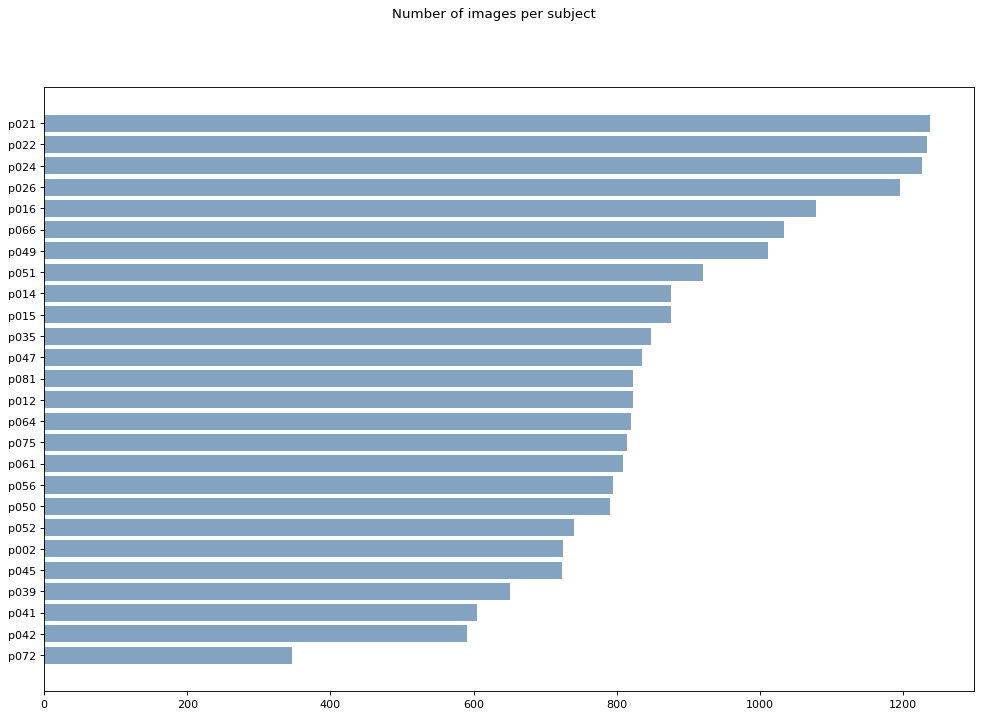

In [ ]:
from matplotlib.pyplot import figure
sub_names = np.unique(driver_imgs_list['subject'])
sub_image_list = [len(driver_imgs_list[driver_imgs_list['subject'] == current_sub]) for current_sub in sub_names]
sub_names,sub_image_list=  pair_sort(sub_names,sub_image_list)

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

y_pos = np.arange(len(sub_names))
# Create horizontal bars
plt.barh(y_pos, sub_image_list,color=(0.2, 0.4, 0.6, 0.6))
 
# Create names on the y-axis
plt.yticks(y_pos,sub_names )
plt.suptitle('Number of images per subject')

# Show graphic
plt.show()

In [ ]:
img_width,img_height = (256,256)
model_input_shape = (img_width,img_height,3)
batch_size = 16
input_image = (img_width,img_height)

def load_image(path):
    read_path = train_path+"/"+path
    image = Image.open(read_path)
    image = image.resize(input_image)
    
    return np.asarray(image)

In [ ]:
def show_images(image_ids,class_names):
    pixels = [load_image(path) for path in image_ids]
    
    num_of_images = len(image_ids)
    
    fig, axes = plt.subplots(
        1, 
        num_of_images, 
        figsize=(5 * num_of_images, 5 * num_of_images),
        
    )
   
    
    for i, image_pixels in enumerate(pixels):
        axes[i].imshow(image_pixels)
        axes[i].axis("off")
        axes[i].set_title(class_names[i])

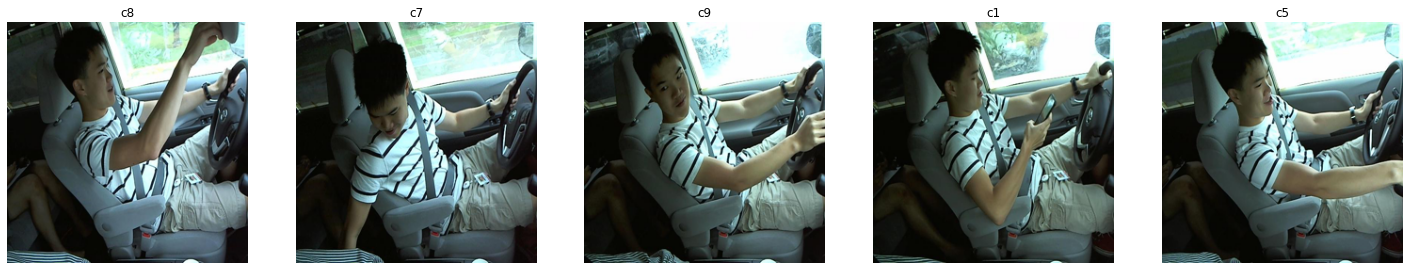

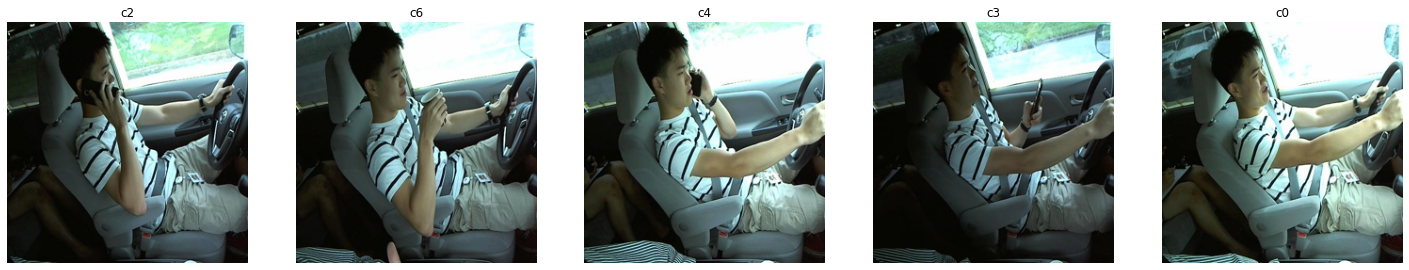

In [ ]:
sub_names_imgs = [ current_class+"/"+driver_imgs_list[driver_imgs_list['classname'] == current_class]['img'].values[0] for current_class in class_names]

show_images(sub_names_imgs[:5],class_names[:5])
show_images(sub_names_imgs[5:],class_names[5:])

In [ ]:
train_path = "/content/imgs/train"

test_path = "/content/imgs/test"

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []


split_rate = 0.8
for current_class in class_names:
    select_df = driver_imgs_list[driver_imgs_list['classname'] == current_class ]
    image_list = select_df['img'].values
    train_amount = int(len(image_list)*split_rate)
    train_list = image_list[:train_amount]
    val_list = image_list[train_amount:]
    
    for filename in train_list:
        x_train.append(load_image(current_class+"/"+filename))
        y_train.append(current_class.replace('c',''))

    for filename in val_list:
        x_val.append(load_image(current_class+"/"+filename))
        y_val.append(current_class.replace('c',''))

In [ ]:
x_train = np.asarray(x_train)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_val = np.asarray(x_val)
y_val =tf.keras.utils.to_categorical(y_val, num_classes=10)
print("Train x Shape: ",x_train.shape)
print("Test x Shape: ",x_val.shape)

Train x Shape:  (17934, 256, 256, 3)
Test x Shape:  (4490, 256, 256, 3)


In [ ]:
print("Train y Shape: ",y_train.shape)
print("Test y Shape: ",y_val.shape)

Train y Shape:  (17934, 10)
Test y Shape:  (4490, 10)


In [ ]:
base_model  = tf.keras.applications.resnet.ResNet50(include_top = False,
                                                  weights = 'imagenet',
                                                  input_shape = model_input_shape)
base_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
x = base_model.output
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dropout(0.5)(x)

output =tf.keras.layers.Dense(units = len(class_names),activation = tf.nn.softmax)(x)
model = tf.keras.models.Model(inputs=base_model.inputs, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
num_epochs = 50
def lr_schedule(epoch,lr):
    # Learning Rate Schedule

    lr = lr
    total_epochs = num_epochs

    check_1 = int(total_epochs * 0.9)
    check_2 = int(total_epochs * 0.8)
    check_3 = int(total_epochs * 0.6)
    check_4 = int(total_epochs * 0.4)

    if epoch > check_1:
        lr *= 1e-4
    elif epoch > check_2:
        lr *= 1e-3
    elif epoch > check_3:
        lr *= 1e-2
    elif epoch > check_4:
        lr *= 1e-1

    print("[+] Current Lr rate : {} ".format(lr))
    return lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
history = model.fit(
      x = x_train,y=y_train,
      validation_data=(x_val,y_val),
      steps_per_epoch=16,
      batch_size = 8,
    
      epochs=num_epochs,
    
    callbacks = [lr_callback],
      verbose=1)

Epoch 1/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [==============================] - 33s 1s/step - loss: 5.7545 - accuracy: 0.1478 - val_loss: 3.7452 - val_accuracy: 0.2076
Epoch 2/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [==============================] - 20s 1s/step - loss: 3.8035 - accuracy: 0.3743 - val_loss: 4.5021 - val_accuracy: 0.2071
Epoch 3/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [==============================] - 20s 1s/step - loss: 2.4940 - accuracy: 0.5105 - val_loss: 3.8784 - val_accuracy: 0.2759
Epoch 4/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [==============================] - 20s 1s/step - loss: 1.2326 - accuracy: 0.7502 - val_loss: 3.6559 - val_accuracy: 0.3318
Epoch 5/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [==============================] - 20s 1s/step - loss: 1.1044 - accuracy: 0.7692 - val_loss: 4.9805 - val_accuracy: 0.2494
Epoch 6/50
[+] Current Lr rate : 9.999999747378752e-05 
16/16 [============

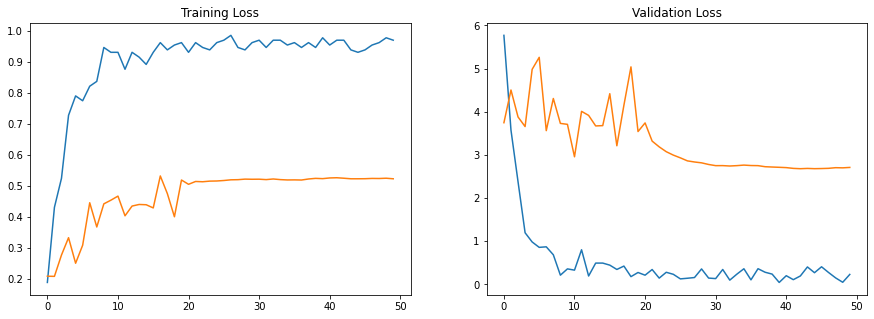

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Training Loss')
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[1].set_title('Validation Loss')
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])

In [ ]:
tf.keras.models.save_model(model, "/content/model.h5",save_format = 'h5')

In [ ]:
ls

-/                    img_100371.jpg
driver_imgs_list.csv  img_100375.jpg
img_100000.jpg        img_100399.jpg
img_100001.jpg        img_100403.jpg
img_100002.jpg        img_100442.jpg
img_100003.jpg        img_100451.jpg
img_100004.jpg        img_100452.jpg
img_100005.jpg        img_100458.jpg
img_100007.jpg        img_100469.jpg
img_100008.jpg        img_100471.jpg
img_100009.jpg        img_100472.jpg
img_10000.jpg         img_10048.jpg
img_100010.jpg        img_100493.jpg
img_100011.jpg        img_100502.jpg
img_100012.jpg        img_10050.jpg
img_100013.jpg        img_100514.jpg
img_100014.jpg        img_100529.jpg
img_100016.jpg        img_10052.jpg
img_10001.jpg         img_100530.jpg
img_100021.jpg        img_100556.jpg
img_100027.jpg        img_100561.jpg
img_100029.jpg        img_100579.jpg
img_100045.jpg        img_100594.jpg
img_100046.jpg        img_100627.jpg
img_100061.jpg        img_100636.jpg
img_1000.jpg          img_100638.jpg
img_100108.jpg        img_100646.jpg
img_

In [ ]:
file_name = "/content/model.h5"

file_stats = os.stat(file_name)

print(file_stats)
print(f'File Size in Bytes is {file_stats.st_size}')
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

os.stat_result(st_mode=33188, st_ino=4287273, st_dev=50, st_nlink=1, st_uid=0, st_gid=0, st_size=299345160, st_atime=1612529874, st_mtime=1612529842, st_ctime=1612529842)
File Size in Bytes is 299345160
File Size in MegaBytes is 285.47779083251953
